In [1]:
from tensorflow.keras import models,layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Modules.Neural_Network import *

In [13]:
model= 'Adam3_model.h5'
path = '/home/jovyan/work/team-network-training/Sprint 5/HDF5Models/'

# model= 'regmodel.h5'
# path= '/home/jovyan/work/team-network-training/Sprint 4/'

loaded_model = tf.keras.models.load_model(path+model, custom_objects={"distance_from_true":distance_from_true,
                                                                      "precentage_from_true": precentage_from_true})       
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 65,537
Trainable params: 65,537
Non-trainable params: 0
____________________________________________________

In [42]:
X = pd.read_csv("X.csv") 
Y = pd.read_csv("Y.csv") 

In [43]:
X

,peelFile,m_uWidth,m_uLength,m_dThickness,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,...,B8AllOtherDefectCount,B9MoistureAvg,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount
0,20210505123334_85.datx,1750.23265,1599.76152,1.56,113.903722,33.013574,997.511787,125.39330,11,26.9537,...,0,125.573666,33.852578,1028.177020,157.62055,19,39.25865,2,16.99255,2
1,20210505135613_40.datx,1750.23265,1603.25064,1.56,92.071652,30.610420,NaN,0.00000,0,0.0000,...,0,98.211824,27.755146,1345.817186,26.36775,4,0.00000,0,0.00000,0
2,20210505150804_9.datx,1750.23265,1599.18000,1.56,100.958000,34.138437,960.649786,0.00000,0,0.0000,...,0,102.624978,34.420791,956.783924,12.89090,1,0.00000,0,7.03140,1
3,20210505125941_29.datx,1750.23265,1601.50608,1.56,87.856679,35.469453,826.694515,21.68015,2,0.0000,...,0,92.774359,35.587531,831.718097,49.21980,3,0.00000,0,16.40660,4
4,20210505123435_23.datx,1750.23265,1600.34304,1.56,119.887972,35.878984,946.037900,22.26610,3,0.0000,...,1,117.015881,35.713047,962.829528,15.82065,3,0.00000,0,450.00960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,20210505125748_61.datx,1750.23265,1600.92456,1.56,91.102849,28.084896,866.985357,65.04045,10,0.0000,...,0,96.584458,27.819479,886.793473,87.30655,9,68.55615,2,0.00000,0
142,20210505145008_84.datx,1750.23265,1601.50608,1.56,96.572480,36.125411,955.628195,56.25120,7,0.0000,...,0,99.583028,35.482129,952.507358,67.97020,9,0.00000,0,0.00000,0
143,20210505125913_15.datx,1614.87820,1596.85392,1.56,87.711933,35.860562,852.048643,43.94625,7,0.0000,...,0,87.069868,35.705692,839.682440,60.93880,11,0.00000,0,0.00000,0
144,20210505124918_24.datx,1750.23265,1601.50608,1.56,89.173291,35.613887,914.581487,96.68175,11,0.0000,...,0,90.566713,34.985859,918.198549,79.10325,9,94.92390,7,0.00000,0


In [44]:
df_features = pd.concat([X,Y], axis=1)
df_features

,peelFile,m_uWidth,m_uLength,m_dThickness,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,...,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryFile,dryWidth,dryShrinkage
0,20210505123334_85.datx,1750.23265,1599.76152,1.56,113.903722,33.013574,997.511787,125.39330,11,26.9537,...,1028.177020,157.62055,19,39.25865,2,16.99255,2,20210505172657_52.datx,1633.089727,0.933070
1,20210505135613_40.datx,1750.23265,1603.25064,1.56,92.071652,30.610420,NaN,0.00000,0,0.0000,...,1345.817186,26.36775,4,0.00000,0,0.00000,0,20210505163725_33.datx,1600.206205,0.914282
2,20210505150804_9.datx,1750.23265,1599.18000,1.56,100.958000,34.138437,960.649786,0.00000,0,0.0000,...,956.783924,12.89090,1,0.00000,0,7.03140,1,20210505155509_66.datx,1609.685322,0.919698
3,20210505125941_29.datx,1750.23265,1601.50608,1.56,87.856679,35.469453,826.694515,21.68015,2,0.0000,...,831.718097,49.21980,3,0.00000,0,16.40660,4,20210505172211_90.datx,1614.120061,0.922232
4,20210505123435_23.datx,1750.23265,1600.34304,1.56,119.887972,35.878984,946.037900,22.26610,3,0.0000,...,962.829528,15.82065,3,0.00000,0,450.00960,1,20210505172314_13.datx,1620.398997,0.925819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,20210505125748_61.datx,1750.23265,1600.92456,1.56,91.102849,28.084896,866.985357,65.04045,10,0.0000,...,886.793473,87.30655,9,68.55615,2,0.00000,0,20210505172725_63.datx,1628.156770,0.930252
142,20210505145008_84.datx,1750.23265,1601.50608,1.56,96.572480,36.125411,955.628195,56.25120,7,0.0000,...,952.507358,67.97020,9,0.00000,0,0.00000,0,20210505163636_13.datx,1602.033861,0.915326
143,20210505125913_15.datx,1614.87820,1596.85392,1.56,87.711933,35.860562,852.048643,43.94625,7,0.0000,...,839.682440,60.93880,11,0.00000,0,0.00000,0,20210505172304_9.datx,1633.337841,1.011431
144,20210505124918_24.datx,1750.23265,1601.50608,1.56,89.173291,35.613887,914.581487,96.68175,11,0.0000,...,918.198549,79.10325,9,94.92390,7,0.00000,0,20210505164707_82.datx,1594.211502,0.910857


In [45]:
df_features=df_features.dropna()
df_features= df_features.drop('m_dThickness', axis=1)

In [46]:
filenames = pd.concat([df_features.pop(x) for x in ['peelFile', 'dryFile']], axis=1)

In [47]:
df_features = df_features[df_features.dryShrinkage < 1]

In [48]:
df_features

,m_uWidth,m_uLength,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,B1DecayCount,B1AllOtherDefectWidthSum,...,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryWidth,dryShrinkage
0,1750.23265,1599.76152,113.903722,33.013574,997.511787,125.39330,11,26.9537,2,0.00000,...,33.852578,1028.177020,157.62055,19,39.25865,2,16.99255,2,1633.089727,0.933070
2,1750.23265,1599.18000,100.958000,34.138437,960.649786,0.00000,0,0.0000,0,21.09420,...,34.420791,956.783924,12.89090,1,0.00000,0,7.03140,1,1609.685322,0.919698
3,1750.23265,1601.50608,87.856679,35.469453,826.694515,21.68015,2,0.0000,0,0.00000,...,35.587531,831.718097,49.21980,3,0.00000,0,16.40660,4,1614.120061,0.922232
4,1750.23265,1600.34304,119.887972,35.878984,946.037900,22.26610,3,0.0000,0,0.00000,...,35.713047,962.829528,15.82065,3,0.00000,0,450.00960,1,1620.398997,0.925819
5,1750.23265,1600.92456,87.329798,36.486844,848.591452,35.15700,5,0.0000,0,0.00000,...,35.626231,849.948758,40.43055,5,0.00000,0,0.00000,0,1601.162675,0.914828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1750.23265,1607.32128,84.348092,27.585250,824.974558,60.93880,3,0.0000,0,26.36775,...,29.414792,844.168201,44.53220,4,0.00000,0,0.00000,0,1606.290275,0.917758
141,1750.23265,1600.92456,91.102849,28.084896,866.985357,65.04045,10,0.0000,0,0.00000,...,27.819479,886.793473,87.30655,9,68.55615,2,0.00000,0,1628.156770,0.930252
142,1750.23265,1601.50608,96.572480,36.125411,955.628195,56.25120,7,0.0000,0,0.00000,...,35.482129,952.507358,67.97020,9,0.00000,0,0.00000,0,1602.033861,0.915326
144,1750.23265,1601.50608,89.173291,35.613887,914.581487,96.68175,11,0.0000,0,0.00000,...,34.985859,918.198549,79.10325,9,94.92390,7,0.00000,0,1594.211502,0.910857


In [49]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets = train_test_split(df_features.drop(["dryShrinkage","dryWidth"],axis=1)
                                                                   ,df_features["dryShrinkage"],test_size=0.3,random_state=42)

In [50]:
train_data.shape

(95, 83)

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
transformed_train_data = ss.fit_transform(train_data)
transformed_test_data = ss.transform(test_data)

In [52]:
transformed_train_data

array([[ 0.10314212,  0.78576828, -0.21555701, ..., -0.39348501,
        -0.37664623, -0.46050409],
       [ 0.10314212, -0.19002239, -0.40756108, ..., -0.39348501,
        -0.37664623, -0.46050409],
       [ 0.10314212, -0.43397006,  0.26043455, ..., -0.39348501,
        -0.37664623, -0.46050409],
       ...,
       [ 0.10314212,  1.27366361,  0.88720183, ..., -0.39348501,
         2.63289365,  0.36492777],
       [ 0.10314212,  0.54182061, -0.51887136, ..., -0.39348501,
        -0.37664623, -0.46050409],
       [ 0.10314212, -0.67791773, -0.3949355 , ..., -0.39348501,
        -0.35705287,  0.36492777]])

In [27]:
model = loaded_model

In [30]:
model.fit(transformed_train_data,train_targets,
          epochs=80,batch_size=32, verbose=1)

test_mse_score, test_mae_score = model.evaluate(transformed_test_data, test_targets)

Epoch 1/80
3/3 [==============================] - 2s 7ms/step - loss: 4.8662e-05 - mae: 0.0063
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 2.2591e-05 - mae: 0.0041
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 8.9254e-06 - mae: 0.0024
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 6.1011e-06 - mae: 0.0018
Epoch 5/80
3/3 [==============================] - 0s 41ms/step - loss: 3.6802e-05 - mae: 0.0056
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 4.3866e-05 - mae: 0.0061
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 2.6769e-05 - mae: 0.0045
Epoch 8/80
3/3 [==============================] - 0s 9ms/step - loss: 9.2951e-06 - mae: 0.0025
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 6.3587e-06 - mae: 0.0022
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 1.4945e-05 - mae: 0.0035
Epoch 11/80
3/3 [==============================

In [31]:
pred = model.predict(transformed_test_data)

In [32]:
targets=[]
for target in test_targets:
    targets.append(target) 

In [35]:
flat_preds = []
for sublist in pred:
    for item in sublist:
        flat_preds.append(item)

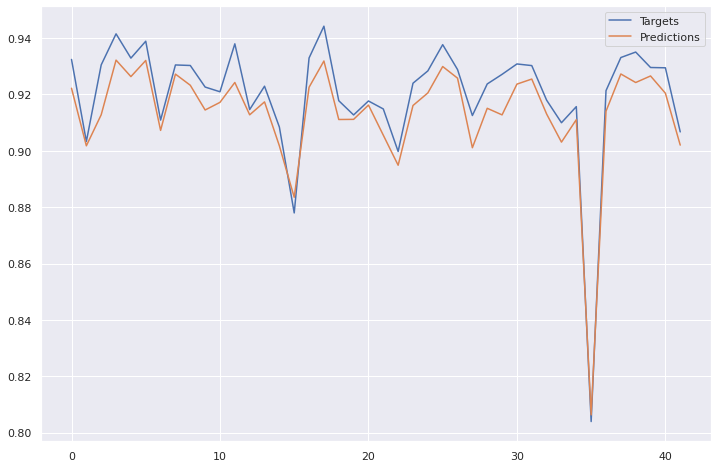

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
import seaborn as sns
sns.set(style="darkgrid")
plt.plot(targets,label="Targets")
plt.plot(flat_preds, label="Predictions")
plt.legend()
plt.show()

## Aikaisempi

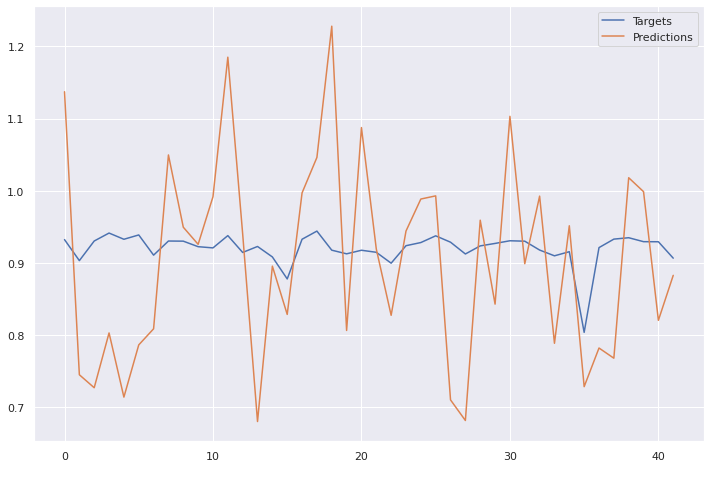


# UUS YRITYS
Käytin vahingossa vanhaa versiota piirrematriisista, josta puuttu `dryMoisturePercentage`-sarake.

## Määritellään datat uusiksi
Otetaan käyttöön siis alkuperäinen data

In [2]:
from Modules.feature_matrix import featureMatrix
from Modules.full_feature_matrix import create_full_feature_and_target_matrix
from timeit import default_timer as timer

In [3]:
X, Y = create_full_feature_and_target_matrix(printProgress=True)

In [4]:
X

,peelFile,m_uWidth,m_uLength,m_dThickness,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,...,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage,traindevtest
0,20210505123334_85.datx,1750.23265,1599.76152,1.56,113.903722,33.013574,997.511787,125.39330,11,26.9537,...,33.852578,1028.177020,157.62055,19,39.25865,2,16.99255,2,8.063503,1
1,20210505150804_9.datx,1750.23265,1599.18000,1.56,100.958000,34.138437,960.649786,0.00000,0,0.0000,...,34.420791,956.783924,12.89090,1,0.00000,0,7.03140,1,1.762412,1
2,20210505125941_29.datx,1750.23265,1601.50608,1.56,87.856679,35.469453,826.694515,21.68015,2,0.0000,...,35.587531,831.718097,49.21980,3,0.00000,0,16.40660,4,0.619572,1
3,20210505123435_23.datx,1750.23265,1600.34304,1.56,119.887972,35.878984,946.037900,22.26610,3,0.0000,...,35.713047,962.829528,15.82065,3,0.00000,0,450.00960,1,0.682885,1
4,20210505125947_34.datx,1750.23265,1600.92456,1.56,87.329798,36.486844,848.591452,35.15700,5,0.0000,...,35.626231,849.948758,40.43055,5,0.00000,0,0.00000,0,0.649544,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,20210505124302_47.datx,1750.23265,1607.32128,1.56,84.348092,27.585250,824.974558,60.93880,3,0.0000,...,29.414792,844.168201,44.53220,4,0.00000,0,0.00000,0,1.397261,3
133,20210505125748_61.datx,1750.23265,1600.92456,1.56,91.102849,28.084896,866.985357,65.04045,10,0.0000,...,27.819479,886.793473,87.30655,9,68.55615,2,0.00000,0,1.308987,1
134,20210505145008_84.datx,1750.23265,1601.50608,1.56,96.572480,36.125411,955.628195,56.25120,7,0.0000,...,35.482129,952.507358,67.97020,9,0.00000,0,0.00000,0,4.549444,2
135,20210505124918_24.datx,1750.23265,1601.50608,1.56,89.173291,35.613887,914.581487,96.68175,11,0.0000,...,34.985859,918.198549,79.10325,9,94.92390,7,0.00000,0,4.294441,3


In [5]:
df_features = pd.concat([X,Y], axis=1)

In [6]:
df_features = df_features.drop(columns=["m_dThickness","traindevtest"])

In [8]:
filenames = pd.concat([df_features.pop(x) for x in ['peelFile', 'dryFile']], axis=1)

In [9]:
df_features

,m_uWidth,m_uLength,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,B1DecayCount,B1AllOtherDefectWidthSum,...,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage,dryWidth,dryShrinkage
0,1750.23265,1599.76152,113.903722,33.013574,997.511787,125.39330,11,26.9537,2,0.00000,...,1028.177020,157.62055,19,39.25865,2,16.99255,2,8.063503,1633.089727,0.933070
1,1750.23265,1599.18000,100.958000,34.138437,960.649786,0.00000,0,0.0000,0,21.09420,...,956.783924,12.89090,1,0.00000,0,7.03140,1,1.762412,1609.685322,0.919698
2,1750.23265,1601.50608,87.856679,35.469453,826.694515,21.68015,2,0.0000,0,0.00000,...,831.718097,49.21980,3,0.00000,0,16.40660,4,0.619572,1614.120061,0.922232
3,1750.23265,1600.34304,119.887972,35.878984,946.037900,22.26610,3,0.0000,0,0.00000,...,962.829528,15.82065,3,0.00000,0,450.00960,1,0.682885,1620.398997,0.925819
4,1750.23265,1600.92456,87.329798,36.486844,848.591452,35.15700,5,0.0000,0,0.00000,...,849.948758,40.43055,5,0.00000,0,0.00000,0,0.649544,1601.162675,0.914828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1750.23265,1607.32128,84.348092,27.585250,824.974558,60.93880,3,0.0000,0,26.36775,...,844.168201,44.53220,4,0.00000,0,0.00000,0,1.397261,1606.290275,0.917758
133,1750.23265,1600.92456,91.102849,28.084896,866.985357,65.04045,10,0.0000,0,0.00000,...,886.793473,87.30655,9,68.55615,2,0.00000,0,1.308987,1628.156770,0.930252
134,1750.23265,1601.50608,96.572480,36.125411,955.628195,56.25120,7,0.0000,0,0.00000,...,952.507358,67.97020,9,0.00000,0,0.00000,0,4.549444,1602.033861,0.915326
135,1750.23265,1601.50608,89.173291,35.613887,914.581487,96.68175,11,0.0000,0,0.00000,...,918.198549,79.10325,9,94.92390,7,0.00000,0,4.294441,1594.211502,0.910857


In [10]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets = train_test_split(df_features.drop(["dryShrinkage","dryWidth"],axis=1)
                                                                   ,df_features["dryShrinkage"],test_size=0.3,random_state=42)

In [11]:
train_data

,m_uWidth,m_uLength,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,B1DecayCount,B1AllOtherDefectWidthSum,...,B9MoistureAvg,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage
60,1750.23265,1602.66912,93.697948,35.673719,923.945817,114.26025,6,0.00000,0,0.00000,...,97.172078,35.765958,945.271183,77.93135,13,0.00000,0,0.00000,0,2.464067
122,1750.23265,1600.34304,91.990476,35.090896,853.213725,151.17510,12,0.00000,0,12.89090,...,93.719074,34.945875,820.954774,29.29750,2,0.00000,0,0.00000,0,1.720802
93,1750.23265,1599.76152,97.930892,34.864010,897.643178,33.98510,3,0.00000,0,14.06280,...,98.537423,34.142519,879.651009,13.47685,1,0.00000,0,0.00000,0,1.014108
44,1750.23265,1598.59848,93.022610,35.568292,857.206999,9.96115,2,0.00000,0,0.00000,...,95.238049,35.135781,852.061700,99.61150,10,0.00000,0,12.89090,2,0.902017
15,1750.23265,1599.76152,106.928307,35.764746,896.213689,17.57850,5,166.99575,7,203.91060,...,127.438286,35.538865,1023.636318,28.12560,4,0.00000,0,309.38160,1,0.706881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1750.23265,1602.66912,119.169635,36.039658,1013.838775,31.05535,3,72.65780,2,441.80630,...,121.749343,35.789707,1006.789704,32.22725,2,144.72965,10,571.88720,3,9.487654
106,1750.23265,1599.76152,90.791294,35.641602,831.104060,91.40820,8,0.00000,0,0.00000,...,93.438505,35.227920,794.532972,22.26610,4,0.00000,0,0.00000,0,1.727392
14,1750.23265,1603.83216,103.504668,35.597771,894.031841,137.11230,8,91.40820,8,189.84780,...,112.083918,36.303330,928.479909,0.00000,0,0.00000,0,450.00960,1,8.580161
92,1750.23265,1602.08760,91.000606,35.240386,809.666906,0.00000,0,0.00000,0,0.00000,...,96.677868,34.595906,818.078321,11.13305,2,0.00000,0,0.00000,0,0.833037


In [12]:
train_targets

60     0.905429
122    0.942437
93     0.916987
44     0.930952
15     0.910014
         ...   
71     0.931643
106    0.928687
14     0.944371
92     0.917505
102    0.917719
Name: dryShrinkage, Length: 95, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
transformed_train_data = ss.fit_transform(train_data)
transformed_test_data = ss.transform(test_data)

In [17]:
transformed_train_data.shape

(95, 84)

### Ladataan valmiiksi koulutettu malli käyttöön

In [18]:
model = loaded_model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 65,537
Trainable params: 65,537
Non-trainable params: 0
____________________________________________________

In [22]:
model.fit(transformed_train_data,train_targets,
          epochs=80,batch_size=32, verbose=1)

# test_mse_score, test_mae_score = model.evaluate(transformed_test_data, test_targets)

Epoch 1/80
3/3 [==============================] - 0s 13ms/step - loss: 3.1826e-12 - mae: 1.3929e-06 - mse: 3.1826e-12 - distance_from_true: 1.9701e-07 - mape: 1.5098e-04 - precentage_from_true: 1.0000
Epoch 2/80
3/3 [==============================] - 0s 17ms/step - loss: 1.9346e-12 - mae: 8.6521e-07 - mse: 1.9346e-12 - distance_from_true: 3.4822e-07 - mape: 9.3874e-05 - precentage_from_true: 1.0000
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 1.8600e-12 - mae: 7.5039e-07 - mse: 1.8600e-12 - distance_from_true: -2.0077e-07 - mape: 8.1517e-05 - precentage_from_true: 1.0000
Epoch 4/80
3/3 [==============================] - 0s 6ms/step - loss: 1.6333e-12 - mae: 6.1424e-07 - mse: 1.6333e-12 - distance_from_true: -1.4431e-08 - mape: 6.6603e-05 - precentage_from_true: 1.0000
Epoch 5/80
3/3 [==============================] - 0s 6ms/step - loss: 1.7982e-12 - mae: 7.2969e-07 - mse: 1.7982e-12 - distance_from_true: 1.3991e-07 - mape: 7.9323e-05 - precentage_from_true: 1.0

In [23]:
pred = model.predict(transformed_test_data)

In [24]:
flat_preds = []
for sublist in pred:
    for item in sublist:
        flat_preds.append(item)

In [25]:
targets=[]
for target in test_targets:
    targets.append(target) 

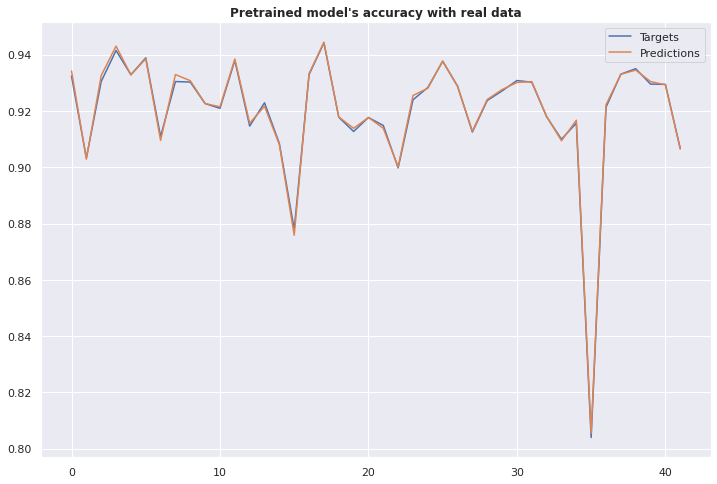

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
import seaborn as sns
sns.set(style="darkgrid")
plt.title("Pretrained model's accuracy with real data",fontsize=(12), fontweight='bold')
plt.plot(targets,label="Targets")
plt.plot(flat_preds, label="Predictions")
plt.legend()
plt.show()

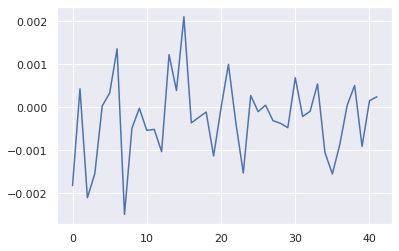

In [27]:
plt.plot(np.array(np.array(targets) - np.array(flat_preds)));